# Problem Statement

**Predict fraudulent credit card online transactions online**.

The dataset contains details of 94,682 transactions, marked as fraudulent or legitimate transactions.

For the purpose of this project, we use **2 ML models (Logistic Regression and Decision Tree)** and compare their utility for correctly determining fraudulent transactions.

Dataset from:https://www.kaggle.com/datasets/adityakadiwal/credit-card-fraudulent-transactions


#### Descriptions for the columns of the dataset:

1. DOMAIN: The domain name of the customer's email address that was used for the transaction (Masked)
2. STATE: The state code of the customer's location.
3. ZIPCODE: The zip code of the customer's location.
4. TIME1: Hour feature #1 of the transaction.
5. TIME2: Hour feature #2 of the transaction.
6. VIS1: Anonymized feature #1 for feature VIS.
7. VIS2: Anonymized feature #2 for feature VIS.
8. XRN1: Anonymized feature #1 for feature XRN.
9. XRN2: Anonymized feature #2 for feature XRN.
10. XRN3: Anonymized feature #3 for feature XRN.
11. XRN4: Anonymized feature #4 for feature XRN.
12. XRN5: Anonymized feature #5 for feature XRN.
13. VAR1: Anonymized feature #1 for feature VAR.
14. VAR2: Anonymized feature #2 for feature VAR.
15. VAR3: Anonymized feature #3 for feature VAR.
16. VAR4: Anonymized feature #4 for feature VAR.
17. VAR5: Anonymized feature #5 for feature VAR.
18. TRN_AMT: The transaction amount.
19. TOTAL_TRN_AMT: The total transaction amount.
20. TRN_TYPE: The type of transaction whether FRAUD or LEGIT.

In [54]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [55]:
# create a DataFrame from the csv file 
df = pd.read_csv('creditcard_fraud.csv')


In [56]:
# quick overview of data
df.head()
df.info()


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

# Cleaning and preprocessing of data

In [57]:
# check for missing data – looks like there's none
df.isnull().sum()

# check for duplicates – there are 5068 duplicates
df.duplicated().sum()

# check for data types – domain, state and trn_type are strings.
df.dtypes

DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

5068

DOMAIN            object
STATE             object
ZIPCODE            int64
TIME1              int64
TIME2              int64
VIS1               int64
VIS2               int64
XRN1               int64
XRN2               int64
XRN3               int64
XRN4               int64
XRN5               int64
VAR1               int64
VAR2               int64
VAR3             float64
VAR4               int64
VAR5               int64
TRN_AMT          float64
TOTAL_TRN_AMT    float64
TRN_TYPE          object
dtype: object

In [58]:
# remove the duplicated rows:
df = df.drop_duplicates()

# check that dupes removed
df.duplicated().sum()


0

In [59]:
# Rename target column and columns with numbers in their names
df = df.rename(columns={'TRN_TYPE':'FRAUD'})

# Map target column values to integers
df['FRAUD'] = df['FRAUD'].map({'LEGIT':0, 'FRAUD':1})
df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,FRAUD
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,0
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,0
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,0
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,0
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,0
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,0
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,0
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,0


# EDA - Exploratory data analysis and visualization. 
To get an understanding of the dataset and the relationships between variables.

<AxesSubplot:ylabel='None'>

Text(0.5, 1.0, 'Percentage of fraud transactions in dataset')

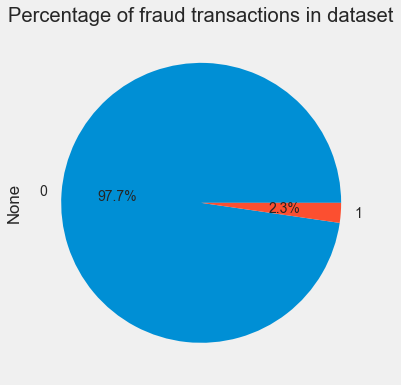

In [60]:
plt.style.use('fivethirtyeight')

df.groupby(by='FRAUD').size().plot(kind='pie', figsize=(12,6), autopct='%1.1f%%')
plt.title('Percentage of fraud transactions in dataset')

# only 2.3% are fraud transactions. Seems like the dataset is class imbalanced.

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,FRAUD
ZIPCODE,1.000000,-0.021470,-0.021997,-0.042764,0.001580,-0.027472,0.013519,0.024570,0.000159,0.016488,-0.001391,0.012150,0.025820,0.016596,0.012260,-0.007146,-0.007056,0.072284
TIME1,-0.021470,1.000000,0.994413,-0.000120,-0.007554,-0.037088,-0.013388,-0.010667,-0.010729,-0.015694,0.000538,0.008769,0.010406,0.010151,-0.010495,0.009178,0.009249,-0.002581
TIME2,-0.021997,0.994413,1.000000,0.000107,-0.006891,-0.038327,-0.013484,-0.010098,-0.010957,-0.015743,0.000584,0.008224,0.009746,0.010612,-0.011034,0.009746,0.009818,-0.002260
VIS1,-0.042764,-0.000120,0.000107,1.000000,-0.047746,0.013821,-0.002654,-0.001692,-0.003512,-0.002867,0.032649,0.011169,0.126120,-0.010902,-0.014041,-0.025465,-0.025566,0.001742
VIS2,0.001580,-0.007554,-0.006891,-0.047746,1.000000,0.028621,-0.009785,-0.015996,-0.003991,0.014143,-0.000283,0.001526,-0.005686,-0.011706,0.004889,-0.011599,-0.011502,0.001146
XRN1,-0.027472,-0.037088,-0.038327,0.013821,0.028621,1.000000,-0.007823,-0.012414,0.090481,-0.027608,-0.025523,-0.084000,0.048738,-0.460061,0.183729,-0.203708,-0.202917,0.003523
XRN2,0.013519,-0.013388,-0.013484,-0.002654,-0.009785,-0.007823,1.000000,0.456147,-0.012563,0.040595,0.013224,0.013100,-0.041452,0.046631,-0.000064,0.100196,0.100074,-0.001994
XRN3,0.024570,-0.010667,-0.010098,-0.001692,-0.015996,-0.012414,0.456147,1.000000,0.002929,0.055300,0.043955,-0.002504,-0.023452,0.042932,0.029270,0.018826,0.018416,-0.003996
XRN4,0.000159,-0.010729,-0.010957,-0.003512,-0.003991,0.090481,-0.012563,0.002929,1.000000,-0.006054,0.038609,-0.020285,-0.028692,-0.097253,0.181022,-0.029586,-0.029625,-0.006985
XRN5,0.016488,-0.015694,-0.015743,-0.002867,0.014143,-0.027608,0.040595,0.055300,-0.006054,1.000000,0.069430,0.007636,-0.009015,-0.025081,0.010974,-0.078837,-0.081832,-0.002832


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

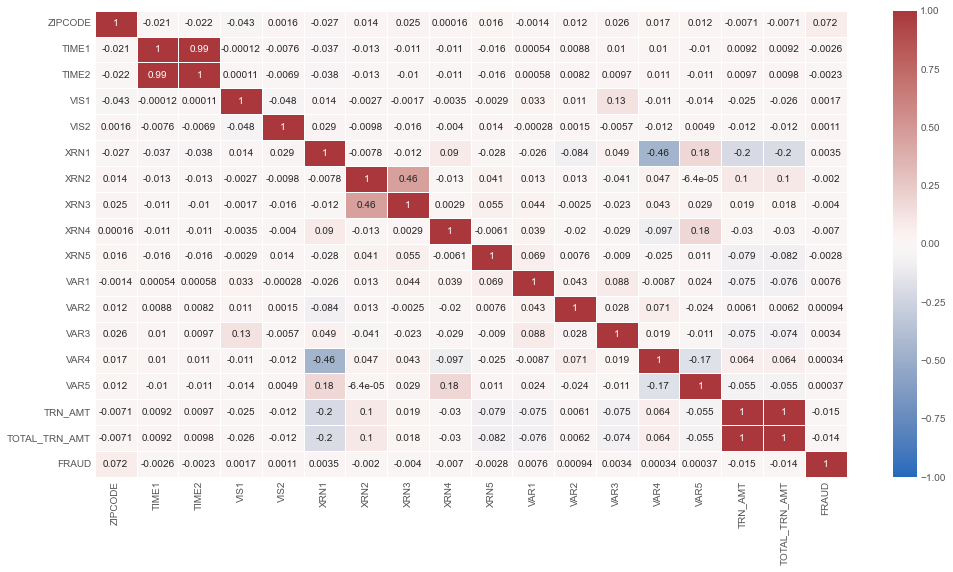

In [61]:
# Using a correlation matrix and then heatmap to visualize the correlation of variables

df.corr()

# set the size of the figure before plotting it
plt.style.use('ggplot')

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='vlag', vmin=-1, vmax=1, linewidths = 1, annot=True)



In [62]:
# From the corr heatmap, there's a slight correlation between zipcode and fraud, which we can investigate further.
# TRN_AMT and TOTAL_TRN_AMT are almost identical (corr 1); we can drop one of those
# Same for TIME1, TIME2; drop one of them

df2 = df.drop(['TOTAL_TRN_AMT'], axis=1)

array([[<AxesSubplot:title={'center':'ZIPCODE'}>,
        <AxesSubplot:title={'center':'TIME1'}>,
        <AxesSubplot:title={'center':'TIME2'}>,
        <AxesSubplot:title={'center':'VIS1'}>],
       [<AxesSubplot:title={'center':'VIS2'}>,
        <AxesSubplot:title={'center':'XRN1'}>,
        <AxesSubplot:title={'center':'XRN2'}>,
        <AxesSubplot:title={'center':'XRN3'}>],
       [<AxesSubplot:title={'center':'XRN4'}>,
        <AxesSubplot:title={'center':'XRN5'}>,
        <AxesSubplot:title={'center':'VAR1'}>,
        <AxesSubplot:title={'center':'VAR2'}>],
       [<AxesSubplot:title={'center':'VAR3'}>,
        <AxesSubplot:title={'center':'VAR4'}>,
        <AxesSubplot:title={'center':'VAR5'}>,
        <AxesSubplot:title={'center':'TRN_AMT'}>],
       [<AxesSubplot:title={'center':'FRAUD'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

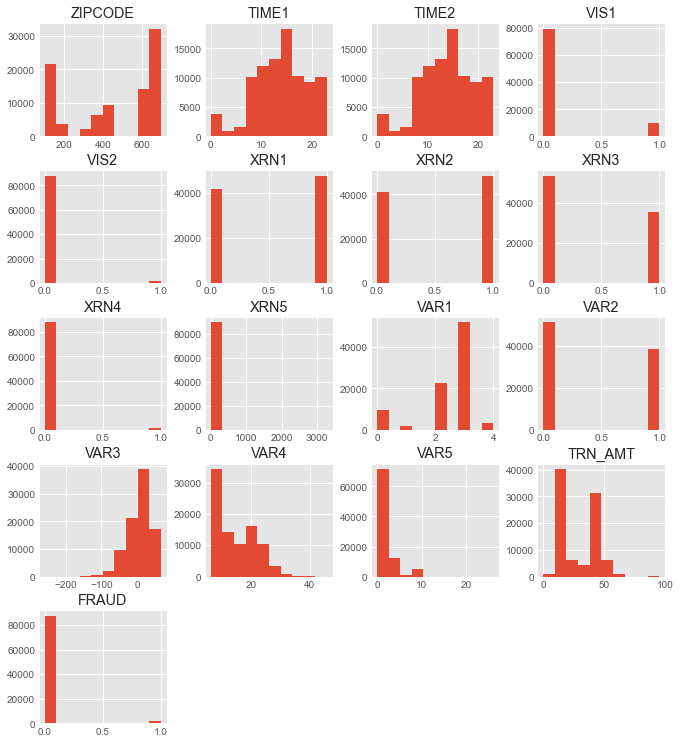

In [63]:
# Check the distribution of each column
df2.hist(figsize=(10,12))

# Some features are binary, some are continuous (TRN AMT, TIME1, VAR3, VAR4)

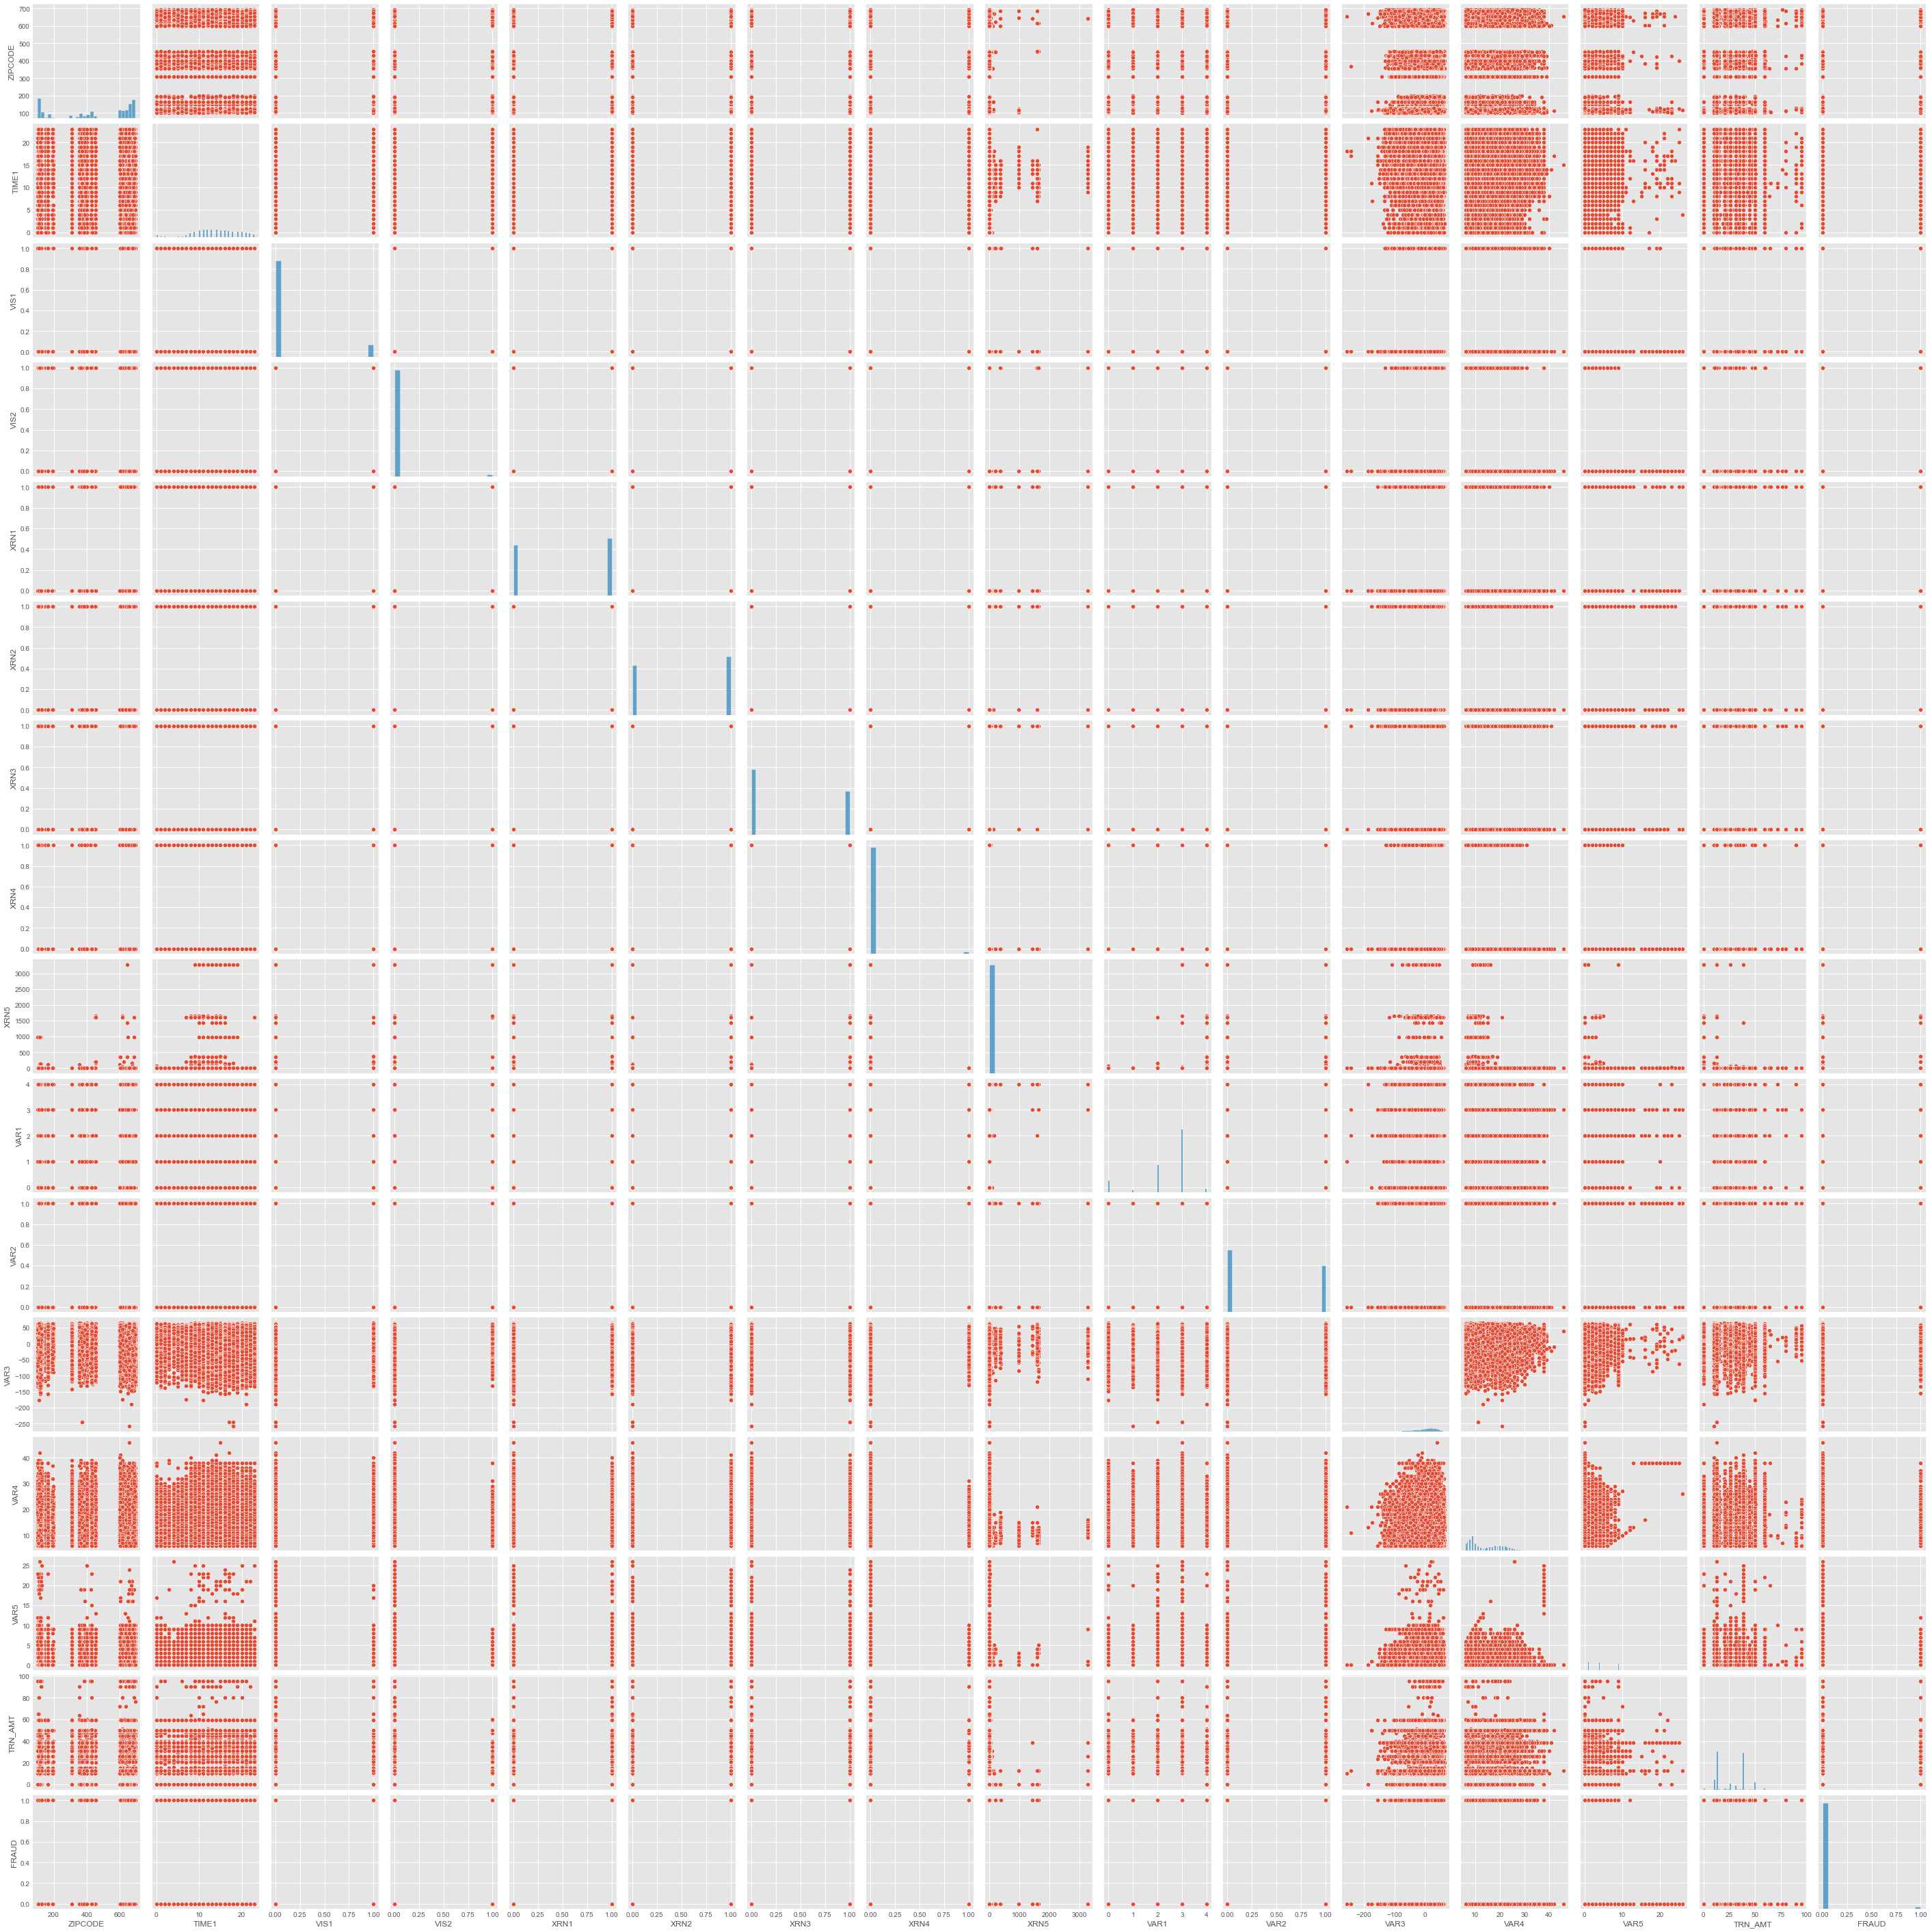

In [24]:
sns.pairplot(df2)

# too many columns in dataframe results in a cramped/useless pairplot.
# for interests of time, will consider looking into this next time.
# e.g. removing some columns and pairplotting the rest

In [64]:
# check number of unique zipcodes, domains and states
# there's a lot of unique domains which is challenging 
df2['ZIPCODE'].nunique()
df2['DOMAIN'].nunique()
df2['STATE'].nunique()

94

9809

53

<AxesSubplot:xlabel='TIME1', ylabel='ZIPCODE'>

Text(0.5, 1.0, 'Fraud txns by zipcode and time')

Text(0.5, 0, 'TIME1')

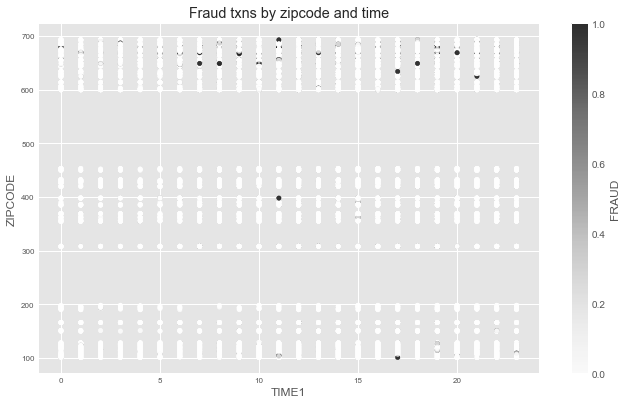

In [65]:
# Investigating zipcode, time and fraud by scatter plot to see their relationship
# there's more fraud in zipcode 600-700 and occurring between time 7-21
plt.style.use('ggplot')

df2.plot(kind='scatter', x='TIME1', y='ZIPCODE', c='FRAUD', alpha=0.8, figsize=(10,6), fontsize=8)
plt.title('Fraud txns by zipcode and time')
plt.xlabel('TIME1')

In [66]:
# Let's group the domains by fraud and see the % of domains with fraud txn
grouped_domains = df2.groupby(['FRAUD', 'DOMAIN'])

# View the groupby object
grouped_domains.count()
fraud_domains = grouped_domains.size()[1]

# Only 5.2% of domains have fraud txn events
print(f'Percentage of domains with fraud txns: {(len(fraud_domains)/ len(grouped_domains)):.2%}')

# Top 50 domains by number of fraud txn
fraud_domains.sort_values(ascending=False).head(10)


STATE  ZIPCODE  TIME1  TIME2  VIS1  VIS2  XRN1  \
FRAUD DOMAIN                                                                  
0     AA.ORG                    23       23     23     23    23    23    23   
      AABGBSDPANNXCVWPE.COM      2        2      2      2     2     2     2   
      AADKPVKIXBCOZV.COM         1        1      1      1     1     1     1   
      AADWGGFIBMOOLT.COM         1        1      1      1     1     1     1   
      AAEWIS.COM                 1        1      1      1     1     1     1   
...                            ...      ...    ...    ...   ...   ...   ...   
1     ZWMNZ.COM                  1        1      1      1     1     1     1   
      ZX.IBM.COM                 2        2      2      2     2     2     2   
      ZXVEZA.NET                 1        1      1      1     1     1     1   
      ZYNNNN.NET                 1        1      1      1     1     1     1   
      ZZLGQIKGJDKAV.COM          2        2      2      2     2     2     2   

                             XRN2  XRN3  XRN4  XRN5  VAR1  VAR2  VAR3  VAR4  \
FRAUD DOMAIN                                                                  
0     AA.ORG                   23    23    23    23    23    23    23    23   
      AABGBSDPANNXCVWPE.COM     2     2     2     2     2     2     2     2   
      AADKPVKIXBCOZV.COM        1     1     1     1     1     1     1     1   
      AADWGGFIBMOOLT.COM        1     1     1     1     1     1     1     1   
      AAEWIS.COM                1     1     1     1     1     1     1     1   
...                           ...   ...   ...   ...   ...   ...   ...   ...   
1     ZWMNZ.COM                 1     1     1     1     1     1     1     1   
      ZX.IBM.COM                2     2     2     2     2     2     2     2   
      ZXVEZA.NET                1     1     1     1     1     1     1     1   
      ZYNNNN.NET                1     1     1     1     1     1     1     1   
      ZZLGQIKGJDKAV.COM         2     2     2     2     2     2     2     2   

                             VAR5  TRN_AMT  
FRAUD DOMAIN                                
0     AA.ORG                   23       23  
      AABGBSDPANNXCVWPE.COM     2        2  
      AADKPVKIXBCOZV.COM        1        1  
      AADWGGFIBMOOLT.COM        1        1  
      AAEWIS.COM                1        1  
...                           ...      ...  
1     ZWMNZ.COM                 1        1  
      ZX.IBM.COM                2        2  
      ZXVEZA.NET                1        1  
      ZYNNNN.NET                1        1  
      ZZLGQIKGJDKAV.COM         2        2  

[10170 rows x 17 columns]

Percentage of domains with fraud txns: 5.20%


DOMAIN
XOSOP.COM        357
TMA.COM          339
VUHZRNB.COM      275
TCN.COM          101
NEKSXUK.NET       82
BRZWCURTY.NET     44
BWT.NET           34
XZXDQOGHY.NET     33
WAJCTHFVP.NET     17
TGRXNMB.NET       16
dtype: int64

In [71]:
# Looking at fraud occurrences by STATE 
grouped_domains2 = df2.groupby(['FRAUD', 'STATE'])
fraud_states = grouped_domains2.size()[1]
fraud_states.sort_values(ascending=False).head(10)

print(f'Percentage of states with fraud txns: {(len(fraud_states)/ len(grouped_domains2)):.2%}')


STATE
AR      243
K       222
KR      221
MO      104
UBAO     94
BR       93
EAO      90
TR       81
AK       80
ROK      76
dtype: int64

Percentage of states with fraud txns: 49.51%


<AxesSubplot:xlabel='STATE_NUMBERS', ylabel='TIME1'>

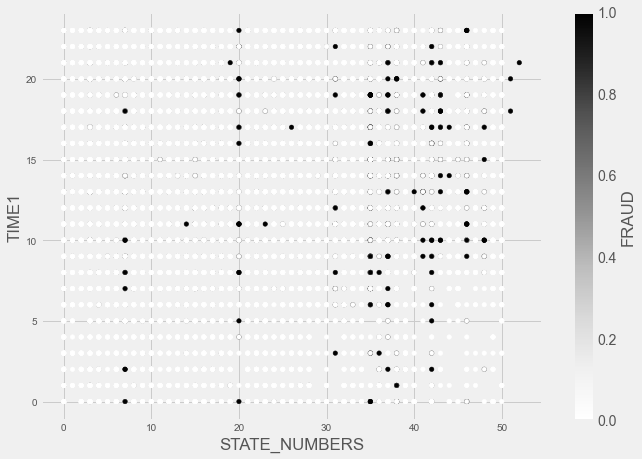

In [84]:
# Create a scatter plot of States, TIME and Fraud.
# But STATE is str, need to convert to int
# by mapping each unique STATE variable to a number

states = df2['STATE'].unique()
list_state = list(states)

# Create a list of 53 numbers
state_numbers = range(0,53)
state_numbers = list(state_numbers)

# use zip to create a dict
zipped_state = zip(list_state,state_numbers)
state_dict = dict(zipped_state)

# map the STATE column to convert the STATE str to numbers
df2['STATE_NUMBERS'] = df2['STATE'].map(state_dict)

plt.style.use('fivethirtyeight')
df2.plot(kind='scatter', x='STATE_NUMBERS' , y='TIME1', c='FRAUD', figsize=(10,7), xlabel='STATE_NUMBERS', fontsize=10)

# Some STATES (vertical column) have more fraud txn events than others.
# We can use STATE and DOMAIN as feature variables in our model.

# remember to drop the new column from our dataframe
df2.drop('STATE_NUMBERS', axis=1, inplace=True)

# Applying supervised ML - classification problem
EDA shows that the data is labelled and predicting fraud transactions (1 or 0) is a classification problem, so it's suitable for supervised machine learning.

We can use classification models. Let's try 2 and see which works best.
1. Logistic Regression
2. Decision Trees





# Model 1 - Logistic Regression 


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# using only number data types first

X = df2.drop('FRAUD', axis=1).select_dtypes(['int', 'float'])
y = df2['FRAUD']

model = LogisticRegression(max_iter=2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))
# Logistic Regression accuracy:  0.9770576682735226

LogisticRegression(max_iter=2000)

Logistic Regression accuracy:  0.9770576682735226


# Feature scaling / standardization
Standardizing the numerical feature variables to help improve iterative model training.

In [86]:
from sklearn.preprocessing import StandardScaler

# initialize transformer 
ss = StandardScaler() 

selected_int = df2.drop('FRAUD', axis=1).select_dtypes(['int','float'])
ss.fit(selected_int)
transformed_int = ss.transform(selected_int)
scaled_df2_int = pd.DataFrame(transformed_int)

# After scaling, apply the log reg model:
model2 = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(scaled_df2_int, y, random_state=0)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))
# Logistic Regression accuracy:  0.9770576682735226

StandardScaler()

LogisticRegression(max_iter=1000)

Logistic Regression accuracy:  0.9770576682735226


### In this case, standardising the feature variables did not improve the model's accuracy.

Accuracy before standardizing: 0.9770576682735226

Accuracy after standardizing: 0.9770576682735226

But the performance has improved, because previously we had to set max_iter = 2000 to prevent a warning, now it can be set to 1000.

# Logistic Regression model with confusion matrix
A confusion matrix helps us better understand our model's performance, and measure it with other metrics e.g. precision and recall.


Recall score: 0.0


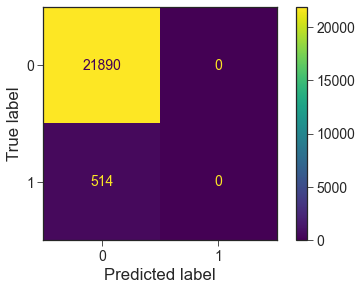

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('seaborn-ticks')
logreg_cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(logreg_cm).plot()

# Number of True Positives: 0
# Number of False Negatives: 514

# The model is classifying most transactions as non-fraud(0) because the dataset is very class-imbalanced from the start, i.e. fraud cases are very uncommon/low percentage.
# So the model's accuracy score is misleading, it's merely reflecting the dataset. 
# i.e. Only 2.3% are fraud txns. If the model predicts all as negatives, it's also 97.7% correct. 

# In our case of detecting fraud, if we decide that the cost of False Negatives are high, 
# i.e. it's better to flag a credit card transaction as fraudulent so that 
# we can investigate or check with the owner, we will use the metric of recall/sensitivity.


# Recall/Sensitivity: TP / (TP + FN) 
recall = logreg_cm[1][1] / (logreg_cm[1][1] + logreg_cm[1][0])
print(f'Recall score: {recall}')

## Add categorical features to model using OneHotEncoding 


In [88]:
# OneHotEncoding encoder finds the unique values per column, 
# transforms data to a binary one-hot encoding.

from sklearn.preprocessing import OneHotEncoder

# We dropped duplicated rows for the df2 dataset, so we need to reset its index
# If not, after one-hot-encoding the columns, the encoded cols will have a sequential index different to df2 which makes joining them problematic / causing NAN values to appear
df3 = df2.reset_index(drop=True)

# Standardize all the number columns, exclude the str and predicted column
standard_data = df3.drop(['FRAUD', 'DOMAIN', 'STATE'], axis=1)
standard_data = (standard_data - standard_data.mean()) / standard_data.std()

cols_to_encode = df3[['DOMAIN','STATE']]

# Instantiate the encoder and use it to fit_transform the cat cols
hotEncoder = OneHotEncoder(max_categories=150, handle_unknown='ignore', drop='if_binary') 
encoded_cols = hotEncoder.fit_transform(cols_to_encode)

# convert the result (sparse matrix) to a dataframe so that we can join it back to our dataset
encoded_cols = pd.DataFrame(encoded_cols.toarray())


# join hot encoded cols with our standardized cols and non-standardized cols
X = standard_data.join(encoded_cols)

# convert feature names from number to str (to prevent warning errors)
X.columns = X.columns.map(str)

y = df3['FRAUD']


LogisticRegression(max_iter=2000)

LogReg model accuracy:  0.97710230316015
Recall score: 0.0019455252918287938


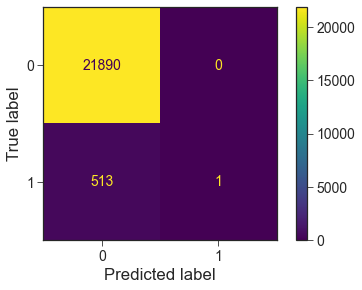

In [89]:
# Applying the logistic regression model on the processed data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

encoded_model = LogisticRegression(max_iter=2000)
encoded_model.fit(X_train, y_train)
y_pred = encoded_model.predict(X_test)

print('LogReg model accuracy: ', accuracy_score(y_test, y_pred))

# Accuracy score went up:
# Before adding DOMAIN and ZIPCODE: 0.9770576682735226
# After: 0.97710230316015

# Checking its recall score and confusion matrix

logreg_cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(logreg_cm).plot()

# Recall/Sensitivity: TP / (TP + FN) 
recall = logreg_cm[1][1] / (logreg_cm[1][1] + logreg_cm[1][0])
print(f'Recall score: {recall}')

# Number of True Positive: 1
# Number of False Negatives: 513 
# Recall/Sensitivity: TP / (TP + FN)

# LogReg model accuracy:  0.97710230316015
# Recall score: 0.0019455252918287938

# Previous recall: 0
# The recall score after adding categorical features is better:

# Model 2: Decision Tree

DecisionTreeClassifier(random_state=0)

Decision Tree accuracy:  0.9584895554365291
Recall score: 0.19455252918287938


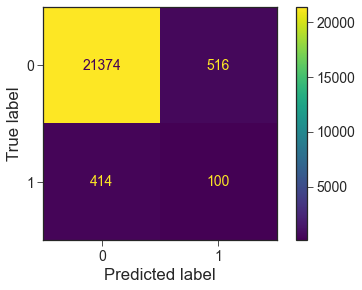

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# initialize and fit model with training data
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

dt_cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(dt_cm).plot()

# Recall/Sensitivity: TP / (TP + FN) 
recall = dt_cm[1][1] / (dt_cm[1][1] + dt_cm[1][0])
print(f'Recall score: {recall}')

# Decision Tree accuracy:  0.9584895554365291
# Recall score: 0.19455252918287938

# It's less accurate than log reg
# but recall/sensitivity is much better (0.195 vs 0.0019)


## Improving decision tree with GridSearchCV
One way to improve our model is using GridSearchCV to iteratively tune its hyperparameters.


In [56]:
# import audio so that when GridSearch is done, we are alerted
# from IPython.display import Audio
# sound_file = 'smb_1-up.wav'

In [91]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring=make_scorer(recall_score))

Best estimator: DecisionTreeClassifier(max_depth=4, random_state=0)
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.022425968785235298


DecisionTreeClassifier(max_depth=4, random_state=0)

Decision Tree accuracy after GridSearch:  0.9763881449741117
Recall score: 0.05642023346303502


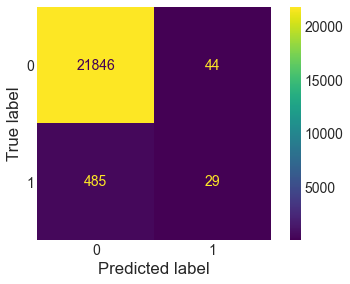

In [98]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# initialize our dt model
dt = DecisionTreeClassifier(random_state=0)

# Create the parameters list we wish to tune.
search_parameters = {
                    'max_depth': list(range(1,5)),
                    'min_samples_leaf': list(range(1,5)),
                    'min_samples_split': list(range(2,5)),
                     }

# Make a accuracy scoring object
from sklearn.metrics import recall_score, accuracy_score 
scorer = make_scorer(recall_score) 
# using recall_score because using accuracy_score here gives a worse result.

# Intialize GridSearchCV with n parallel jobs running
clf = GridSearchCV(dt, search_parameters, scoring=scorer, n_jobs=4)

clf.fit(X,y)

print('Best estimator:', clf.best_estimator_)
print('Best parameters:', clf.best_params_)
print('Best score:', clf.best_score_)

#  wrap in dataframe to see the results in a table format
# pd.DataFrame(clf.cv_results_)


# Get the estimator.
best_dt = clf.best_estimator_

# Fit the best model.
best_dt.fit(X_train, y_train)

# Make predictions using the best model.
best_predictions = best_dt.predict(X_test)

print('Decision Tree accuracy after GridSearch: ', accuracy_score(y_test,best_predictions))

# Checking its recall score using confusion matrix 

dt_cm = confusion_matrix(y_test,best_predictions)
cm_display = ConfusionMatrixDisplay(dt_cm).plot()

# Recall/Sensitivity: TP / (TP + FN) 
recall = dt_cm[1][1] / (dt_cm[1][1] + dt_cm[1][0])
print(f'Recall score: {recall}')


# play sound when done
# Audio(sound_file, autoplay=True)


# Previously:
# Decision Tree accuracy:  0.9584895554365291
# Recall score: 0.19455252918287938

# After Gridsearch, 
# Best Decision Tree accuracy:  0.9763881449741117
# Recall score: 0.05642023346303502

# Accuracy improved, but recall/sensitivity decreased.

# Using AUC-ROC Curve to compare the models

AUC (Area Under Curve) - ROC (Receiver Operator Characteristic) curve is a performance measurement for classification problems at different threshold settings. ROC is a probability curve and AUC represents the degree of separability. Higher AUC means the model is better at predicting classes (0 or 1) correctly.

LogisticRegression(max_iter=2000)

DecisionTreeClassifier(max_depth=4, random_state=0)

DecisionTreeClassifier(random_state=0)

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive rate')

LogReg AUC score is 0.7818376903975128
GridSearch Decision Tree AUC score is 0.6542666462841266
Decision Tree AUC score is 0.5867090137635471


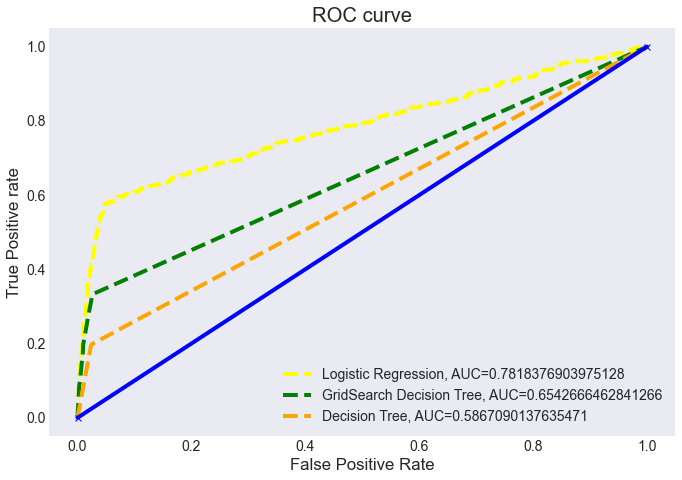

In [97]:
#roc curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

#fit our models
encoded_model.fit(X_train, y_train)
best_dt.fit(X_train, y_train)
dt.fit(X_train, y_train)

# predict probabilities
pred_prob1 = encoded_model.predict_proba(X_test)[:,1] #returns probabilities of a classification label
pred_prob2 = best_dt.predict_proba(X_test)[:,1]
pred_prob3 = dt.predict_proba(X_test)[:,1]

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3)

# auc scores
auc1 = roc_auc_score(y_test, pred_prob1)
auc2 = roc_auc_score(y_test, pred_prob2)
auc3 = roc_auc_score(y_test, pred_prob3)

# plotting graph 
plt.style.use('seaborn-dark')
plt.figure(figsize=(10,7))
plt.plot(fpr1, tpr1, linestyle='--',color='yellow', label='Logistic Regression, AUC='+str(auc1))
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='GridSearch Decision Tree, AUC='+str(auc2))
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='Decision Tree, AUC='+str(auc3))
plt.plot([0,1], [0,1], marker='x',linestyle='-', color='blue')

# add legend and axis labels
plt.legend()

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')



print(f'LogReg AUC score is {auc1}')
print(f'GridSearch Decision Tree AUC score is {auc2}')
print(f'Decision Tree AUC score is {auc3}')


# Conclusion: 
## Logistic Regression model vs Decision Tree model

It seems that the Logistic Regression model performs the best in classification with the highest AUC score. 

However, when we look at recall/sensitivity, Log Reg has the lowest score. 

Ranking by recall:
1. Decision Tree (0.195)
2. GridSearch/Best Decision Tree (0.0564)
3. Logistic Regression Model (0.0019)

## Findings:

* Features with most correlation with fraud: DOMAIN, STATE, ZIPCODE 
* The Logistic Regression model performed the best, but it still has room for improvement.
* We can increase recall/sensitivity (i.e. detecting higher % of fraud txns out of total fraud txns). Recall = TP / (TP + FN)
* However, increasing sensitivity will also increase number of false positives, which lowers precision. Precision = TP / (TP + FP)

In our case, if the cost of false negatives is high (i.e. cost of losing money due to undetected fraud transactions), then we should focus on recall.

## Next steps:
1. Learn more on feature scaling: standardization vs min-max normalization, when to use which.
2. Try using less feature variables; select only a few with high correlation.
3. Consider ZIPCODE as a categorical variable, perhaps binning it into ranges for better performance.
4. Try other GridSearch hyperparameters to build an improved model 
5. Try other Decision Tree models that accept categorical features without needing to encode them.
6. Learn more on handling severely class imbalanced datasets.

